# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [125]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [126]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sisimiut
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | misratah
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | praia
Processing Record 7 of Set 1 | penon blanco
Processing Record 8 of Set 1 | tromso
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | groningen
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | solleftea
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | al'met'yevsk
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | vallenar
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | lagunillas
Processing Record 21 of Set 1 | yuzhno-kurilsk
Processing Record 22 of Set 1 | vilyuchinsk
Processing Record 23 of Set

Processing Record 39 of Set 4 | tazacorte
Processing Record 40 of Set 4 | dong ha
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | anna regina
Processing Record 43 of Set 4 | vorkuta
Processing Record 44 of Set 4 | enriquillo
Processing Record 45 of Set 4 | jamestown
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | tiksi
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | gubkinskiy
Processing Record 0 of Set 5 | fort bragg
Processing Record 1 of Set 5 | steinbach
Processing Record 2 of Set 5 | jiagedaqi
Processing Record 3 of Set 5 | heber city
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | navashino
Processing Record 6 of Set 5 | boa vista
Processing Record 7 of Set 5 | santo domingo zanatepec
Processing Record 8 of Set 5 | kulunda
Processing Record 9 of Set 5 | cooper's town
Processing Record 10 of Set 5 | khandyga
Processing Record 11 of Set 5 | toga village
City not found. Skipping...
Proces

Processing Record 29 of Set 8 | ninotsminda
Processing Record 30 of Set 8 | arua
Processing Record 31 of Set 8 | lander
Processing Record 32 of Set 8 | irbit
Processing Record 33 of Set 8 | usogorsk
Processing Record 34 of Set 8 | annau
Processing Record 35 of Set 8 | mount airy
Processing Record 36 of Set 8 | el alto
Processing Record 37 of Set 8 | al hudaydah
Processing Record 38 of Set 8 | saint-philippe
Processing Record 39 of Set 8 | ambikapur
Processing Record 40 of Set 8 | savsjo
City not found. Skipping...
Processing Record 41 of Set 8 | chakia
Processing Record 42 of Set 8 | navapolatsk
Processing Record 43 of Set 8 | fort-shevchenko
Processing Record 44 of Set 8 | omdurman
Processing Record 45 of Set 8 | nar'yan-mar
Processing Record 46 of Set 8 | maumere
Processing Record 47 of Set 8 | fallsburg
Processing Record 48 of Set 8 | yerofey pavlovich
Processing Record 49 of Set 8 | holualoa
Processing Record 0 of Set 9 | tukrah
Processing Record 1 of Set 9 | kavali
Processing Reco

Processing Record 17 of Set 12 | los frentones
Processing Record 18 of Set 12 | okha
Processing Record 19 of Set 12 | colonel hill
Processing Record 20 of Set 12 | sevran
Processing Record 21 of Set 12 | voskresenskoye
Processing Record 22 of Set 12 | st. john's
Processing Record 23 of Set 12 | granite shoals
Processing Record 24 of Set 12 | port isabel
Processing Record 25 of Set 12 | moratalla
Processing Record 26 of Set 12 | kongsvinger
Processing Record 27 of Set 12 | awjilah
Processing Record 28 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 29 of Set 12 | tenno
Processing Record 30 of Set 12 | thanh hoa
Processing Record 31 of Set 12 | luanco
Processing Record 32 of Set 12 | canutama
Processing Record 33 of Set 12 | naze
Processing Record 34 of Set 12 | tangalle
Processing Record 35 of Set 12 | xianju
Processing Record 36 of Set 12 | magadan
Processing Record 37 of Set 12 | dudinka
Processing Record 38 of Set 12 | barra velha
Processing Record 39 of Se

In [127]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [128]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sisimiut,66.9395,-53.6735,-2.53,76,19,6.03,GL,1697314738
1,tralee,52.2704,-9.7026,9.36,65,95,3.99,IE,1697314703
2,invercargill,-46.4000,168.3500,7.79,88,95,4.92,NZ,1697314738
3,misratah,32.3754,15.0925,23.55,61,0,2.95,LY,1697314739
4,grytviken,-54.2811,-36.5092,-2.62,83,43,3.56,GS,1697314739


In [129]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [130]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-2.53,76,19,6.03,GL,1697314738
1,tralee,52.2704,-9.7026,9.36,65,95,3.99,IE,1697314703
2,invercargill,-46.4000,168.3500,7.79,88,95,4.92,NZ,1697314738
3,misratah,32.3754,15.0925,23.55,61,0,2.95,LY,1697314739
4,grytviken,-54.2811,-36.5092,-2.62,83,43,3.56,GS,1697314739


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

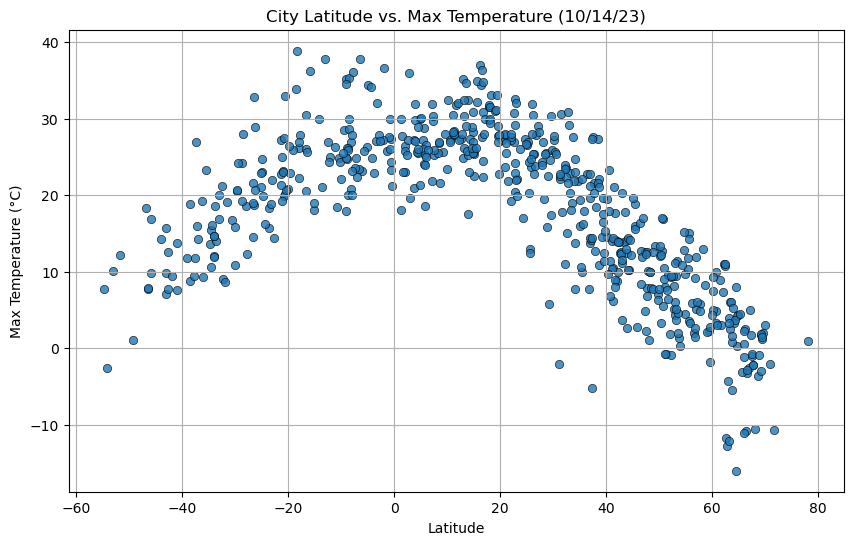

In [131]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

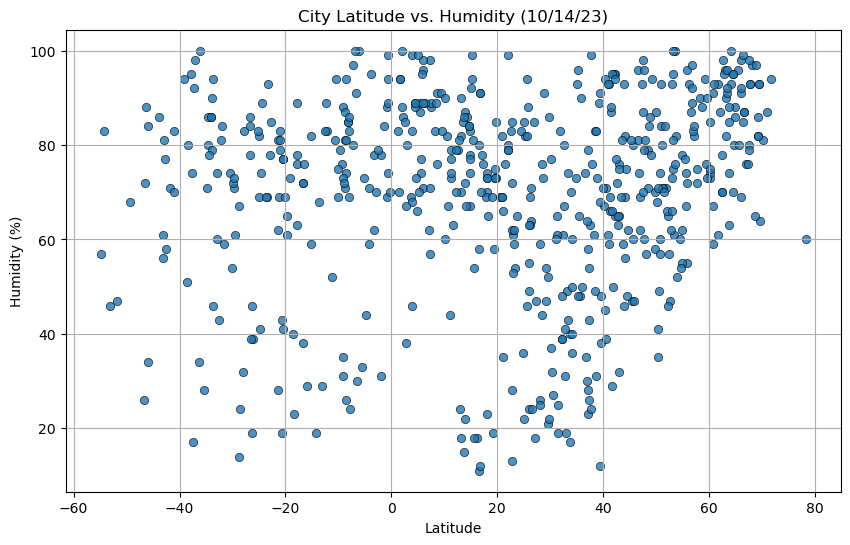

In [132]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

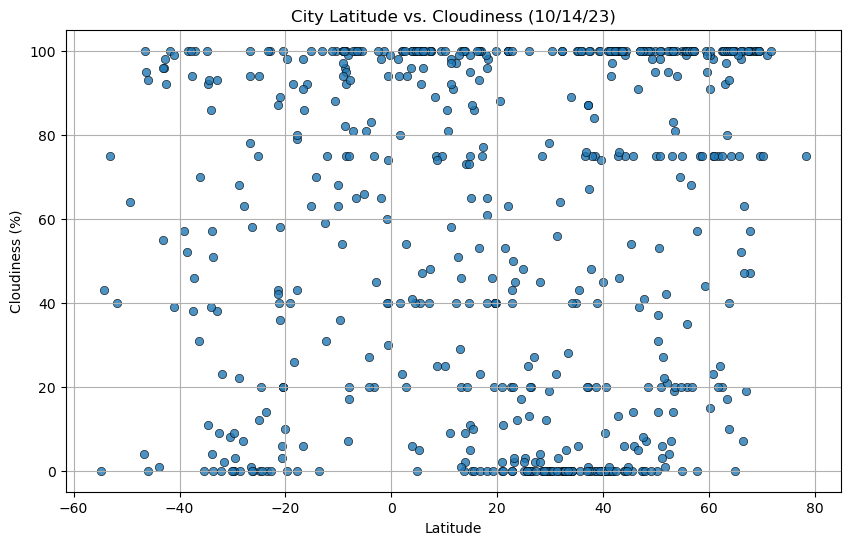

In [133]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

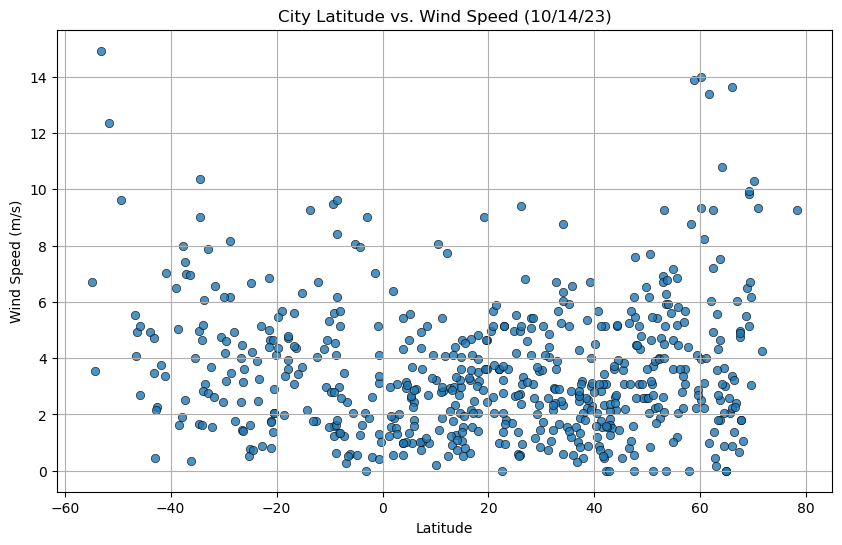

In [134]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=0.5, alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Use current date for title
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [146]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_reg(x_values, y_values, title, filename):
    # Perform regression on southern hemisphere
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=0.5, alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(title.split(' vs. ')[1])
    #plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.text(min(x_values),max(y_values),line_eq,fontsize=12, color='red')

    print(f"The r-value is: {r_value}")

    # Save the figure
    plt.savefig(filename)

    # Show plot
    plt.show()





In [147]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sisimiut,66.9395,-53.6735,-2.53,76,19,6.03,GL,1697314738
1,tralee,52.2704,-9.7026,9.36,65,95,3.99,IE,1697314703
3,misratah,32.3754,15.0925,23.55,61,0,2.95,LY,1697314739
5,praia,14.9215,-23.5087,28.30,83,75,4.63,CV,1697314477
6,penon blanco,24.7897,-104.0369,27.29,36,48,4.96,MX,1697314739


In [148]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,invercargill,-46.4000,168.3500,7.79,88,95,4.92,NZ,1697314738
4,grytviken,-54.2811,-36.5092,-2.62,83,43,3.56,GS,1697314739
8,adamstown,-25.0660,-130.1015,21.11,69,94,0.76,PN,1697314740
10,port lincoln,-34.7333,135.8667,13.63,71,100,4.98,AU,1697314740
12,chonchi,-42.6128,-73.8092,12.56,58,92,2.28,CL,1697314741


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8644982101661222


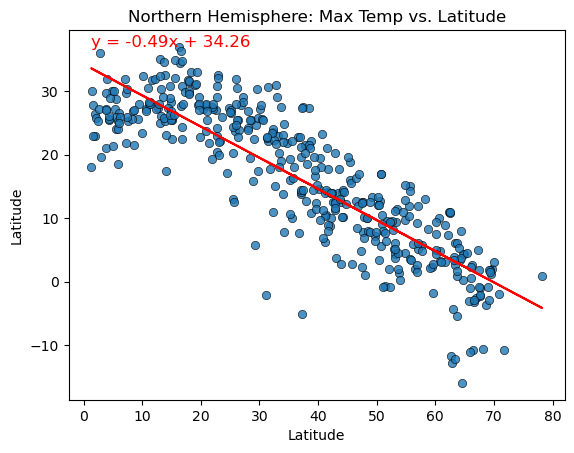

In [149]:
# Linear regression on Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Max Temp vs. Latitude", "../output_data/NH_Temp_vs_Lat.png")


The r-value is: 0.7525462323673329


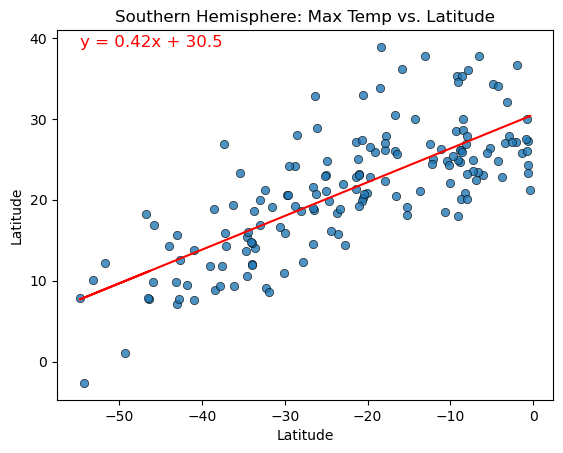

In [150]:
# Linear regression on Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Max Temp vs. Latitude", "../output_data/SH_Temp_vs_Lat.png")


**Discussion about the linear relationship:** 

**Northern Hemisphere**
- There's a strong negative relationship between latitude and temperature. Simply put, as you move north (towards the North Pole), it gets colder.

**Southern Hemisphere**
- There's a strong positive relationship between latitude and temperature. This means as you move north (but closer to the equator), it gets warmer.

**Summary:**
- Temperatures are generally warmer near the equator because of direct sunlight. As you move towards the poles, it gets colder. Latitude is a key factor in predicting temperature, mostly because of how sunlight spreads across different areas.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1620173841531443


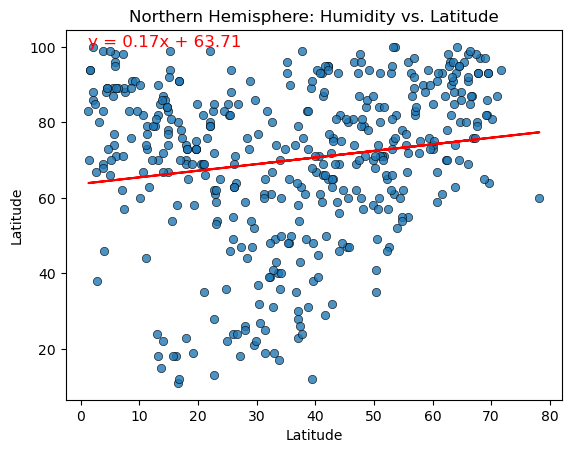

In [151]:
# Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude", "../output_data/NH_hHum_vs_Lat.png")


The r-value is: 0.08765221944204521


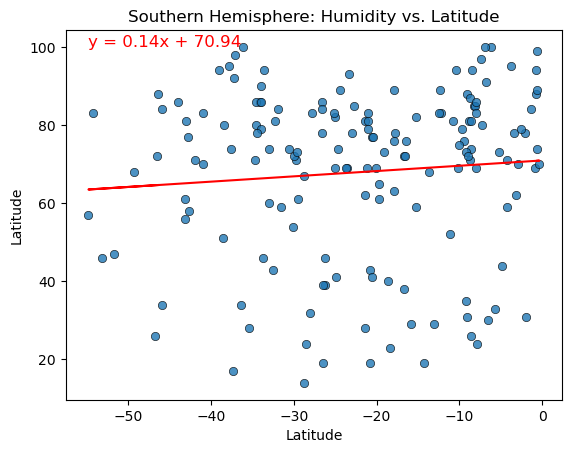

In [152]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude", "../output_data/SH_hHum_vs_Lat.png")


**Discussion about the linear relationship:** 

**Northern Hemisphere**
- There's a weak positive relationship between latitude and humidity. This suggests that as you move north, there might be a slight increase in humidity, but the relationship is not strong.

**Southern Hemisphere**
- The relationship between latitude and humidity in the southern hemisphere is even weaker than the northern. As you move north (towards the equator), there's a very slight increase in humidity.

**Summary:**
- In both hemispheres, while there is a positive relationship between latitude and humidity, the strength of this relationship is weak. This indicates that factors other than latitude might have a stronger influence on humidity levels in these regions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12422158665903366


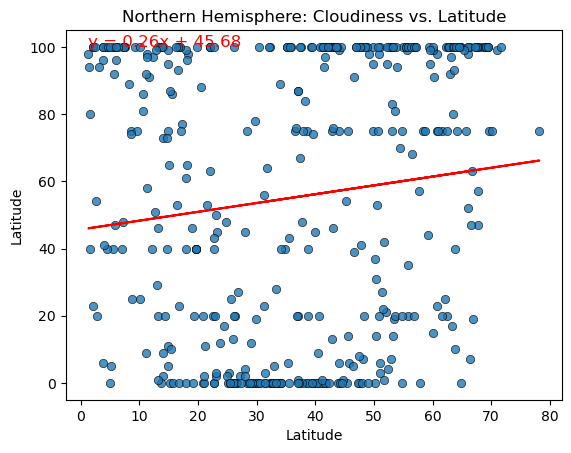

In [153]:
# Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude", "../output_data/NH_Cloud_vs_Lat.png")


The r-value is: 0.20701307749479228


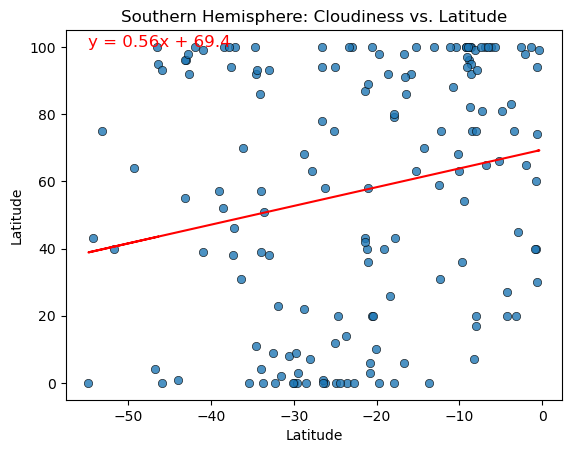

In [154]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude", "../output_data/SH_Cloud_vs_Lat.png")

**Discussion about the linear relationship:** 

**Northern Hemisphere**
- There's a weak positive correlation between latitude and cloudiness. As one moves further north, there might be a slight increase in cloudiness, but it's not a strong relationship.

**Southern Hemisphere**
- In the southern hemisphere, the positive relationship between latitude and cloudiness is slightly stronger compared to the northern hemisphere. As you move northwards (closer to the equator), cloudiness tends to increase, but again, the correlation is relatively weak.

**Summary:**
- For both hemispheres, there's a mild positive relationship between latitude and cloudiness, with the southern hemisphere showing a bit stronger of a connection. However, in both cases, the relationship isn't very strong. This indicates that while latitude may play a role in cloud formation, other factors will likely have a more significant influence on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2584410291556559


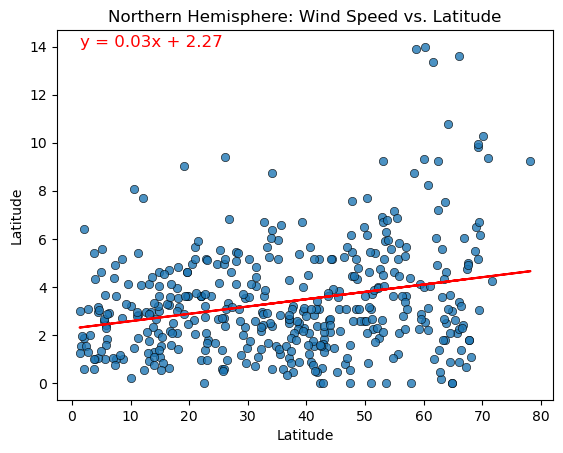

In [155]:
# Northern Hemisphere
plot_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude", "../output_data/NH_WindS_vs_Lat.png")


The r-value is: -0.27671694214504605


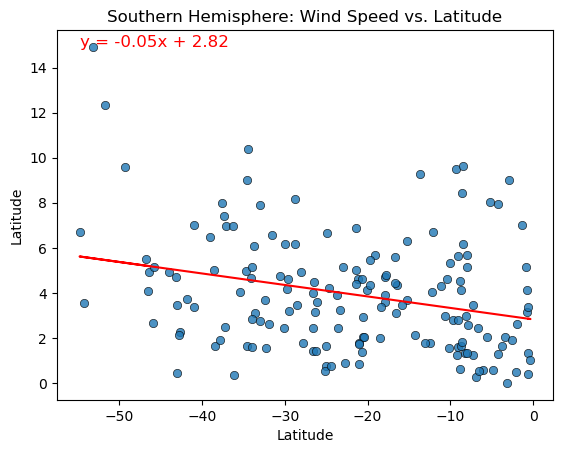

In [156]:
# Southern Hemisphere
plot_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude", "../output_data/SH_WindS_vs_Lat.png")


**Discussion about the linear relationship:** 

**Northern Hemisphere**
- There's a slight positive correlation between latitude and wind speed, implying wind speeds may increase a bit as you move north.

**Southern Hemisphere**
- A slight negative correlation exists, suggesting wind speeds decrease as you approach the equator.

**Summary:**
- Wind speeds are somewhat higher near the poles and lower near the equator, but the relationships aren't very strong. The correlations hint at varying wind patterns based on hemisphere and distance from the equator.